In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [262]:
df1 = pd.read_csv("train.csv",encoding='unicode_escape')
df1.shape


(1460, 81)

In [263]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [264]:
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [265]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [267]:
#check missing percentage
percent_missing = (df1.isnull().sum() / df1.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64

In [268]:
#Lets drop as it is an identifier
df1.drop(['Id'],axis=1,inplace=True)

In [269]:
# We will drop the first 5 columns as they have large of data missing and this might have a negative effect on the model later
df1.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [270]:
#checking missng values again
percent_missing = (df1.isnull().sum() / df1.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
dtype: float64

In [271]:
# Of the columns that have data missing, 3 of them are numeric columns and the rest are categorical columns

In [272]:
#Handling missing data from Numeric Columns 

In [273]:
#Impute mean/median or drop

In [274]:
df1[['LotFrontage']].describe()


,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


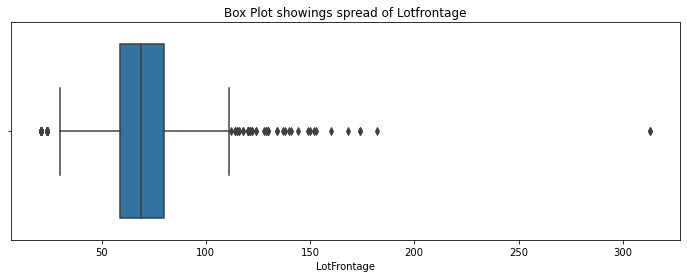

In [275]:
#LotFrontage
plt.figure(figsize=[12,4])
sns.boxplot(data =df1, x='LotFrontage')
plt.title('Box Plot showings spread of Lotfrontage')
plt.show()

In [276]:
#Lotfrontage has approx 17% data missing and as the box plot shows it also has outlier hence imoputing using median instead of mean
df1['LotFrontage']= df1.LotFrontage.fillna(df1.LotFrontage.median()) 

In [277]:
df1[['MasVnrArea']].describe()


,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


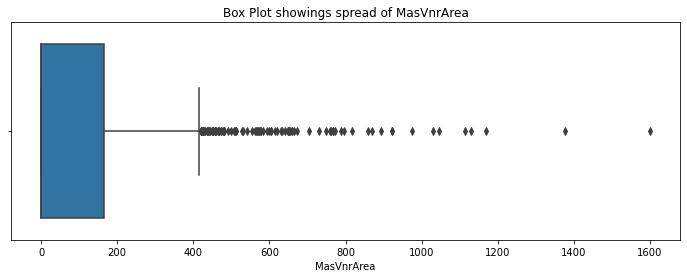

In [278]:
#MasVnrArea
plt.figure(figsize=[12,4])
sns.boxplot(data =df1, x='MasVnrArea')
plt.title('Box Plot showings spread of MasVnrArea')
plt.show()

In [279]:
#MasVnrArea has approx 0.5% data missing and as the box plot shows it also has outlier hence imputing using median instead of mean
df1['MasVnrArea']= df1.MasVnrArea.fillna(df1.MasVnrArea.median())


In [280]:
df1[['GarageYrBlt']].describe()


,GarageYrBlt
count,1379.000000
mean,1978.506164
std,24.689725
min,1900.000000
25%,1961.000000
50%,1980.000000
75%,2002.000000
max,2010.000000


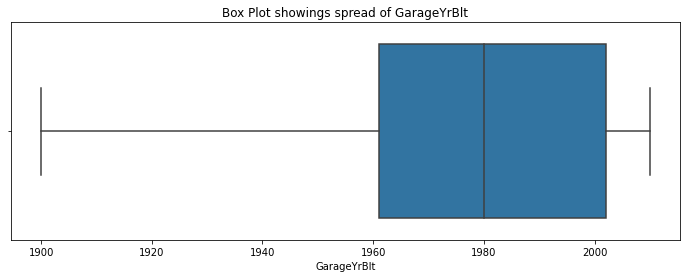

In [281]:
#GarageYrBlt

plt.figure(figsize=[12,4])
sns.boxplot(data =df1, x='GarageYrBlt')
plt.title('Box Plot showings spread of GarageYrBlt')
plt.show()

In [282]:
#GarageYrBlt has approx 0.5% data missing and  the box plot shows that it doesn't have outlier hence using Median to impute to impute data
#Not using mean beacause its years
df1['GarageYrBlt']= df1.GarageYrBlt.fillna(df1.GarageYrBlt.median()) 


In [283]:
df1['GarageYrBlt'].value_counts()



1980.0    96
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
2009.0    21
1958.0    21
1962.0    21
1965.0    21
1966.0    21
1970.0    20
2001.0    20
1957.0    20
1996.0    20
1960.0    19
1997.0    19
1954.0    19
1978.0    19
1994.0    18
1964.0    18
1974.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1967.0    15
1969.0    15
1979.0    15
1940.0    14
1988.0    14
1973.0    14
1972.0    14
1920.0    14
1955.0    13
1971.0    13
1961.0    13
1992.0    13
1953.0    12
1948.0    11
1987.0    11
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1925.0    10
1991.0     9
1939.0     9
1975.0     9
1984.0     8
1930.0     8
1949.0     8
1983.0     7
1986.0     6
1926.0     6
1951.0     6
1922.0     5
1936.0     5
1916.0     5
1945.0     4
1946.0     4
1928.0     4
1931.0     4
1935.0     4
1982.0     4
1952.0     3

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

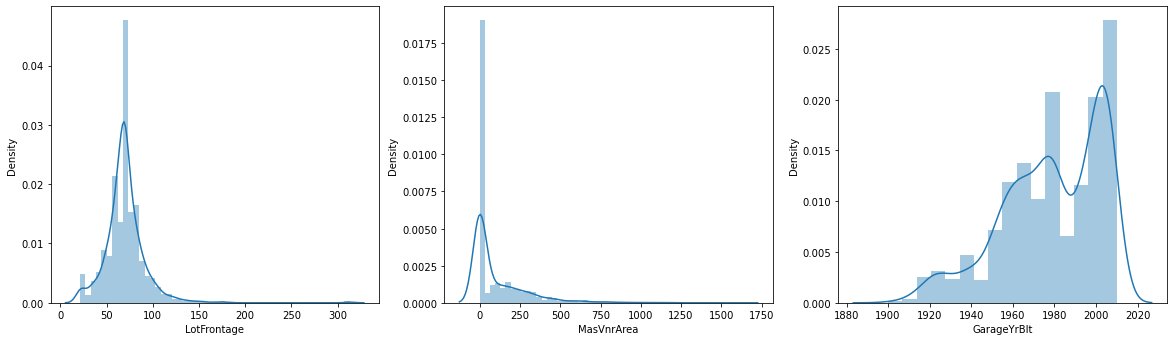

In [284]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df1['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(df1['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(df1['GarageYrBlt'])

In [285]:
#From data dictionary we know that NA for the following fields does not represent missing value but the lack of the feature for example NA in the GarageType doesnt mean that is missing, it represents that the house doesn't have a garage
# Using that as a base, we will change all NA's to corresponding entries from data dictionary
#Fields where this will be done are GarageType,GarageCond,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual


In [286]:
df1['GarageType'] = df1['GarageType'].replace(np.nan, 'No Garage')
df1['GarageCond'] = df1['GarageCond'].replace(np.nan, 'No Garage')
df1['GarageFinish'] = df1['GarageFinish'].replace(np.nan, 'No Garage')
df1['GarageQual'] = df1['GarageQual'].replace(np.nan, 'No Garage')
df1['BsmtFinType2'] = df1['BsmtFinType2'].replace(np.nan, 'No Basement')
df1['BsmtExposure'] = df1['BsmtExposure'].replace(np.nan, 'No Basement')
df1['BsmtFinType1'] = df1['BsmtFinType1'].replace(np.nan, 'No Basement')
df1['BsmtCond'] = df1['BsmtCond'].replace(np.nan, 'No Basement')
df1['BsmtQual'] = df1['BsmtQual'].replace(np.nan, 'No Basement')

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

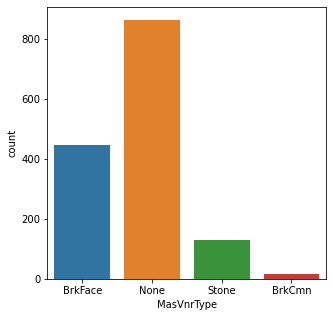

In [287]:
#Now taking care of NA where data dictionary has no corresponding entries


plt.figure(figsize=(5, 5))
sns.countplot(x = 'MasVnrType', data = df1)


In [288]:
# None has the highest represntation in the above graph hence we will use "None" to replace all the NA's
df1['MasVnrType'] = df1['MasVnrType'].replace(np.nan, 'None')

<AxesSubplot:xlabel='Electrical', ylabel='count'>

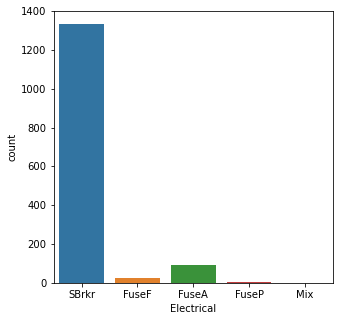

In [289]:
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Electrical', data = df1)

In [290]:
# SBrkr has the highest represntation in the above graph hence we will use "SBrkr" to replace all the NA's
df1['Electrical'] = df1['Electrical'].replace(np.nan, 'SBrkr')

In [291]:
#Rechecking for blanks
percent_missing = (df1.isnull().sum() / df1.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
dtype: float64

In [292]:
#ALL the missing values have been taken care of

In [293]:
#Now changing all the values which show up as continous values but are actually categorical values to categorical values
#These columns are - MSSubClass, OverallQual,OverallCond

In [294]:
df1['MSSubClass']=df1['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})


In [295]:
df1['OverallQual']=df1['OverallQual'].replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

In [296]:
df1['OverallCond']=df1['OverallCond'].replace({ 10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

In [297]:
#Year to Age

#Converting the year into age
current_year = date.today().year
df1['YearBuilt_Age'] = current_year - df1['YearBuilt']
df1['YearRemodAdd_Age'] = current_year - df1['YearRemodAdd']
df1['YrSold_Age'] = current_year - df1['YrSold']
df1['GarageYrBlt_Age'] = current_year - df1['GarageYrBlt']

In [298]:
# Dropping the columns that have been replaced with age
df1.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [299]:
#MoSold should not have any effect on the dependant Variable
df1.drop(['MoSold'], axis=1, inplace = True)

In [300]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,WD,Normal,208500,19,19,14,19.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,WD,Normal,181500,46,46,15,46.0
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,WD,Normal,223500,21,20,14,21.0
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,WD,Abnorml,140000,107,52,16,24.0
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,WD,Normal,250000,22,22,14,22.0


In [301]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   object 
 16  OverallCond       1460 non-null   object 


In [302]:
#Exploring the data


In [303]:
#-- Categorical values

In [304]:
#Getting list of categorical values
cValues = df1.select_dtypes(include=['object'])
cValues.shape

(1460, 41)

In [305]:
cValues.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

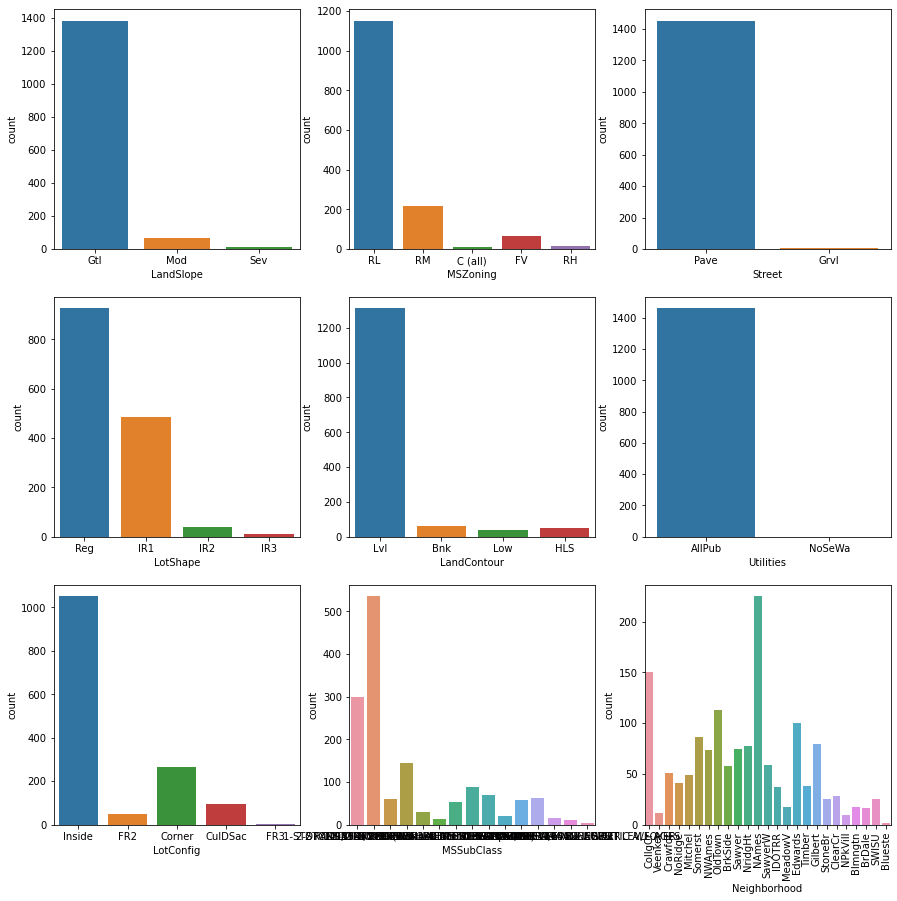

In [306]:
#We will take 9 columns at a time and check them
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'MSSubClass',  data = df1,ax=axes[2,1])
plt.xticks(rotation=90)
sns.countplot(x = 'MSZoning',  data = df1,ax=axes[0,1])
sns.countplot(x = 'Street',  data = df1,ax=axes[0,2])
sns.countplot(x = 'LotShape',  data = df1,ax=axes[1,0])
sns.countplot(x = 'LandContour',  data = df1,ax=axes[1,1])
sns.countplot(x = 'Utilities',  data = df1,ax=axes[1,2])
sns.countplot(x = 'LotConfig',  data = df1,ax=axes[2,0])
sns.countplot(x = 'LandSlope',  data = df1,ax=axes[0,0])
sns.countplot(x = 'Neighborhood',  data = df1,ax=axes[2,2])
plt.xticks(rotation=90)
plt.show()


In [307]:
#Checking values of columns that looked skewed

In [308]:
#landslope
df1.LandSlope.value_counts()


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [309]:
df1.Street.value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [310]:
df1.Utilities.value_counts()


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [311]:
#We will drop Landslope,utilities and street from the dataframe as the data is highly skewed towards a particular value

In [312]:
df1.drop(['LandSlope','Utilities','Street'],axis=1,inplace=True)


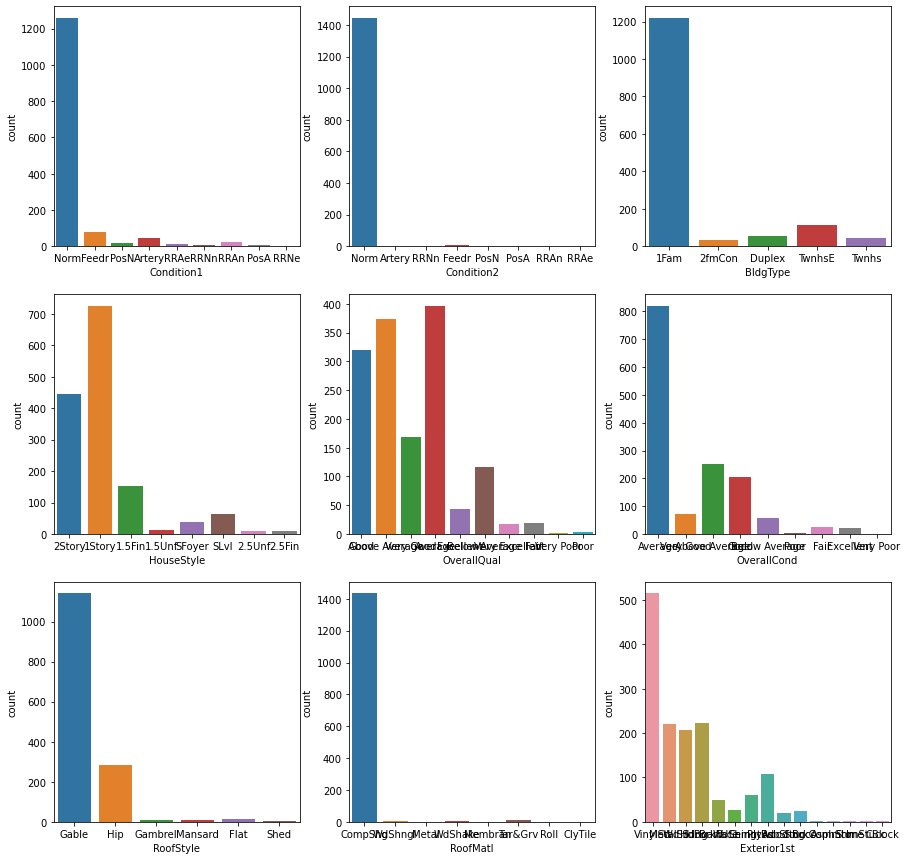

In [313]:
#Checking the next 9 values
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'Condition1',  data = df1,ax=axes[0,0])
sns.countplot(x = 'Condition2',  data = df1,ax=axes[0,1])
sns.countplot(x = 'BldgType',  data = df1,ax=axes[0,2])
sns.countplot(x = 'HouseStyle',  data = df1,ax=axes[1,0])
sns.countplot(x = 'OverallQual',  data = df1,ax=axes[1,1])
sns.countplot(x = 'OverallCond',  data = df1,ax=axes[1,2])
sns.countplot(x = 'RoofStyle',  data = df1,ax=axes[2,0])
sns.countplot(x = 'RoofMatl',  data = df1,ax=axes[2,1])
sns.countplot(x = 'Exterior1st',  data = df1,ax=axes[2,2])
plt.show()


In [314]:
#Checking values of columns that looked skewed

In [315]:
df1.Condition1.value_counts()


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [316]:
df1.Condition2.value_counts()


Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [317]:
df1.RoofMatl.value_counts()


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [318]:
df1.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [319]:
#Dropping Condition1,Condition2 and RoofMatl

In [320]:
df1.drop(['Condition1','Condition2','RoofMatl'],axis=1,inplace=True)


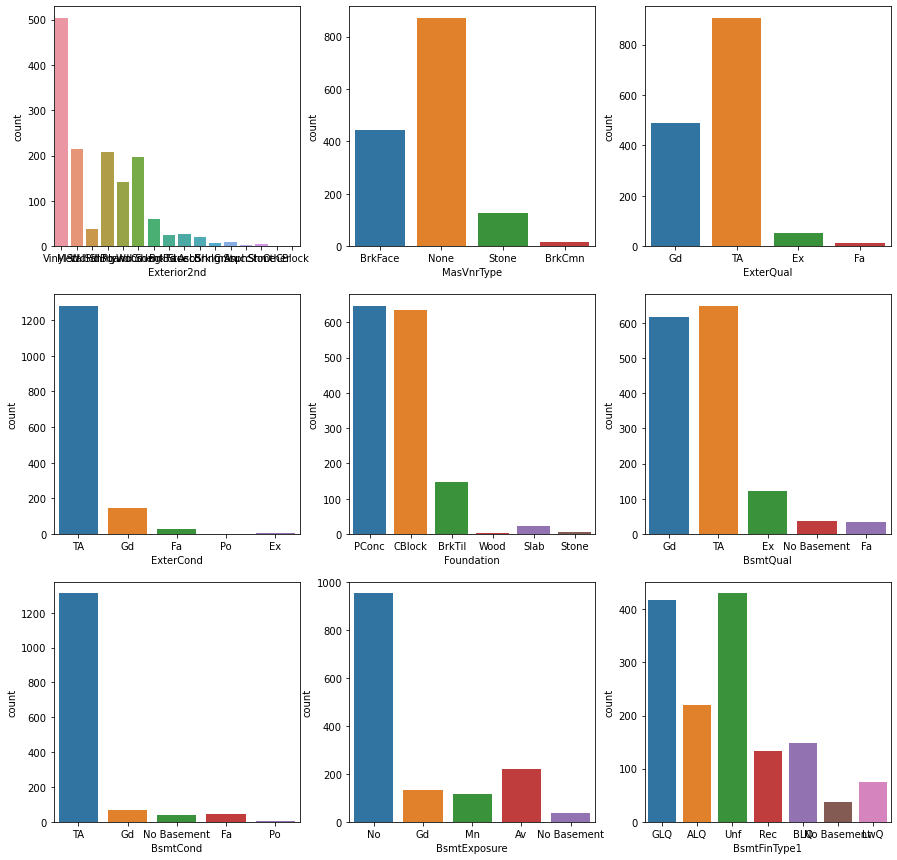

In [321]:
#Checking the next 9 values
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'Exterior2nd',  data = df1,ax=axes[0,0])
sns.countplot(x = 'MasVnrType',  data = df1,ax=axes[0,1])
sns.countplot(x = 'ExterQual',  data = df1,ax=axes[0,2])
sns.countplot(x = 'ExterCond',  data = df1,ax=axes[1,0])
sns.countplot(x = 'Foundation',  data = df1,ax=axes[1,1])
sns.countplot(x = 'BsmtQual',  data = df1,ax=axes[1,2])
sns.countplot(x = 'BsmtCond',  data = df1,ax=axes[2,0])
sns.countplot(x = 'BsmtExposure',  data = df1,ax=axes[2,1])
sns.countplot(x = 'BsmtFinType1',  data = df1,ax=axes[2,2])
plt.show()


In [322]:
#Checking values of columns that looked skewed

In [323]:
df1.ExterCond.value_counts()


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [324]:
df1.ExterQual.value_counts()


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [325]:
df1.BsmtCond.value_counts()


TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [326]:
########Change###
#Taking a self-Judgement call and dropping only ExterCond and BsmtCond
df1.drop(['ExterCond','BsmtCond'],axis=1,inplace=True)


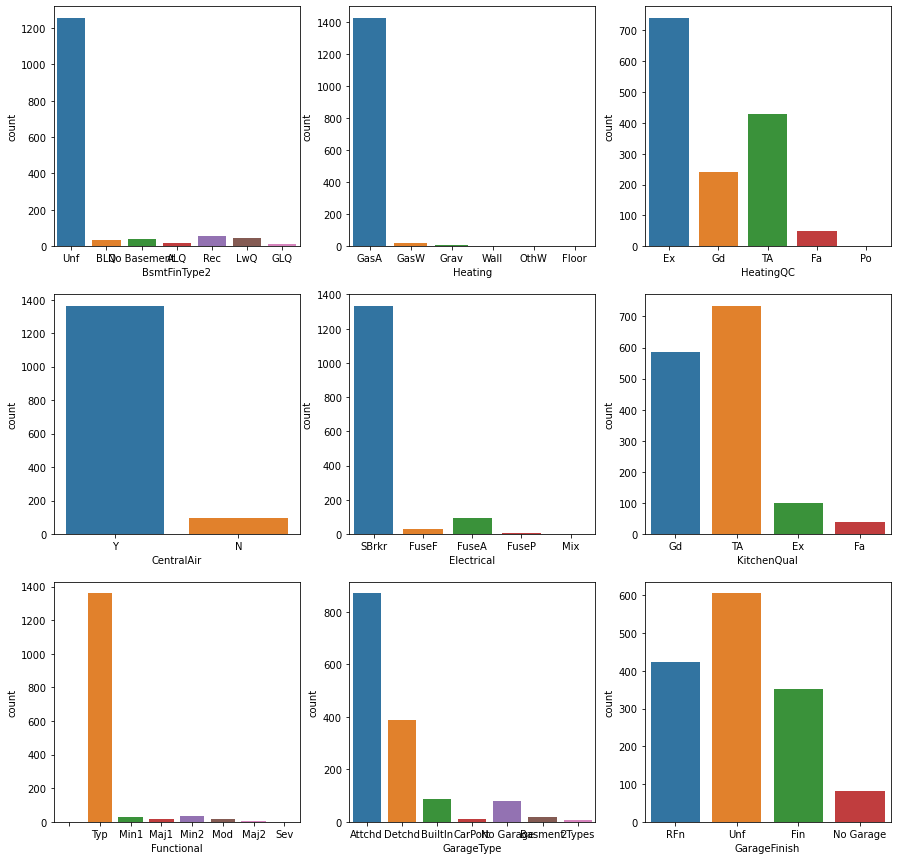

In [327]:
#Checking the next 9 values
fig, axes = plt.subplots(3, 3,figsize=(15, 15))
sns.countplot(x = 'BsmtFinType2',  data = df1,ax=axes[0,0])
sns.countplot(x = 'Heating',  data = df1,ax=axes[0,1])
sns.countplot(x = 'HeatingQC',  data = df1,ax=axes[0,2])
sns.countplot(x = 'CentralAir',  data = df1,ax=axes[1,0])
sns.countplot(x = 'Electrical',  data = df1,ax=axes[1,1])
sns.countplot(x = 'KitchenQual',  data = df1,ax=axes[1,2])
sns.countplot(x = 'Functional',  data = df1,ax=axes[2,0])
sns.countplot(x = 'GarageType',  data = df1,ax=axes[2,1])
sns.countplot(x = 'GarageFinish',  data = df1,ax=axes[2,2])
plt.show()


In [328]:
#Checking values of columns that looked skewed

In [329]:
df1.Heating.value_counts()


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [330]:
df1.Functional.value_counts()


Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
           1
Sev        1
Name: Functional, dtype: int64

In [331]:
#Dropping Heating and Functional

In [332]:

df1.drop(['BsmtFinType2','Heating','Functional','CentralAir','Electrical'],axis=1,inplace=True)


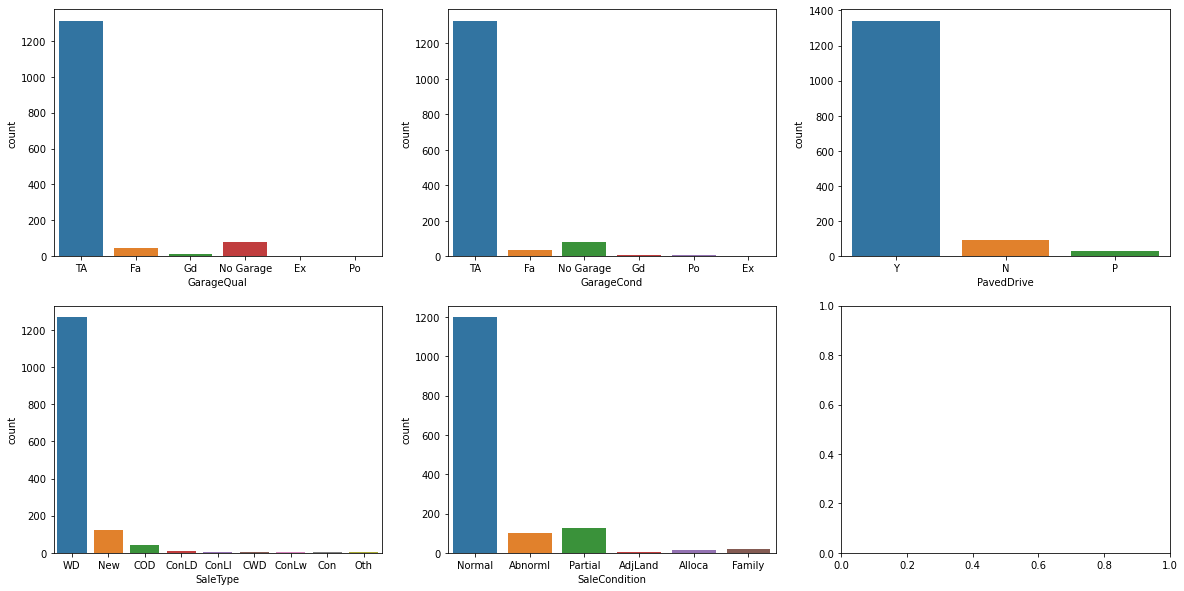

In [333]:
#Checking the last 5 column left
fig, axes = plt.subplots(2, 3,figsize=(20, 10))
sns.countplot(x = 'GarageQual',  data = df1,ax=axes[0,0])
sns.countplot(x = 'GarageCond',  data = df1,ax=axes[0,1])
sns.countplot(x = 'PavedDrive',  data = df1,ax=axes[0,2])
sns.countplot(x = 'SaleType',  data = df1,ax=axes[1,0])
sns.countplot(x = 'SaleCondition',  data = df1,ax=axes[1,1])
plt.show()

In [334]:
# NOT Dropping any of the above as they seem like important features

In [335]:
#Checking continous Variables- Univariate Only

In [336]:
conValues = df1.select_dtypes(include=['Float64','Int64'])
conValues.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age'],
      dtype='object')

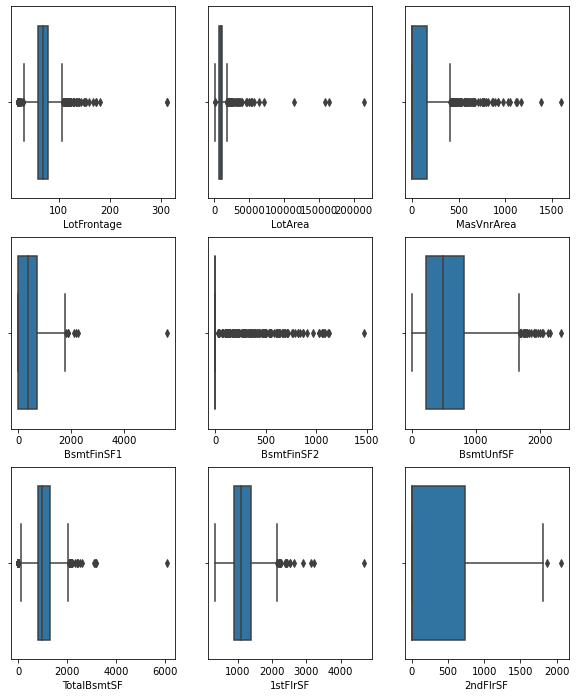

In [337]:
#Checking the first 9 Columns
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'LotFrontage',  data = df1,ax=axes[0,0])
sns.boxplot(x = 'LotArea',  data = df1,ax=axes[0,1])
sns.boxplot(x = 'MasVnrArea',  data = df1,ax=axes[0,2])
sns.boxplot(x = 'BsmtFinSF1',  data = df1,ax=axes[1,0])
sns.boxplot(x = 'BsmtFinSF2',  data = df1,ax=axes[1,1])
sns.boxplot(x = 'BsmtUnfSF',  data = df1,ax=axes[1,2])
sns.boxplot(x = 'TotalBsmtSF',  data = df1,ax=axes[2,0])
sns.boxplot(x = '1stFlrSF',  data = df1,ax=axes[2,1])
sns.boxplot(x = '2ndFlrSF',  data = df1,ax=axes[2,2])
plt.show()

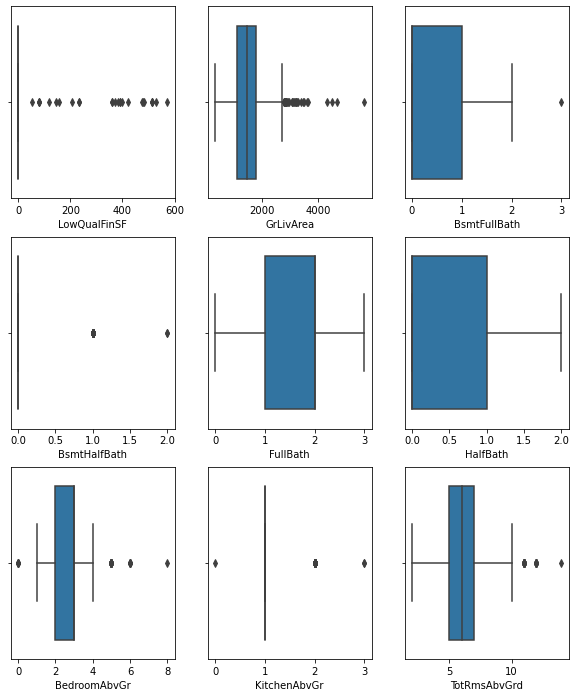

In [338]:
#Checking the Next 9 Columns
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'LowQualFinSF',  data = df1,ax=axes[0,0])
sns.boxplot(x = 'GrLivArea',  data = df1,ax=axes[0,1])
sns.boxplot(x = 'BsmtFullBath',  data = df1,ax=axes[0,2])
sns.boxplot(x = 'BsmtHalfBath',  data = df1,ax=axes[1,0])
sns.boxplot(x = 'FullBath',  data = df1,ax=axes[1,1])
sns.boxplot(x = 'HalfBath',  data = df1,ax=axes[1,2])
sns.boxplot(x = 'BedroomAbvGr',  data = df1,ax=axes[2,0])
sns.boxplot(x = 'KitchenAbvGr',  data = df1,ax=axes[2,1])
sns.boxplot(x = 'TotRmsAbvGrd',  data = df1,ax=axes[2,2])
plt.show()

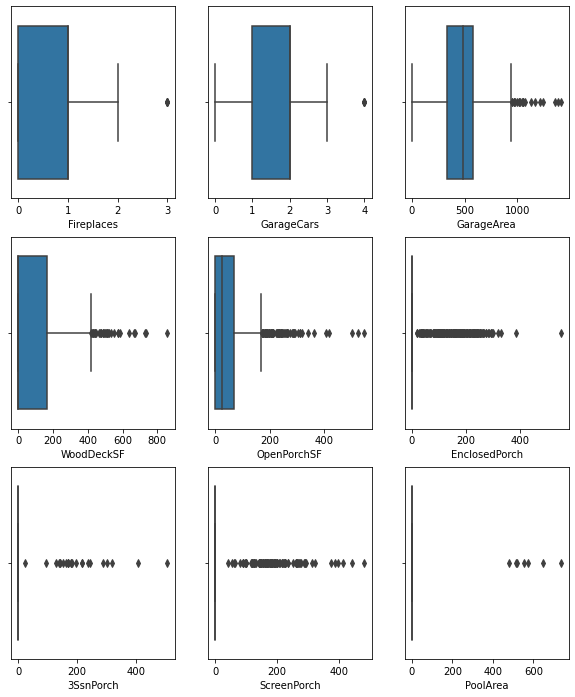

In [339]:
#The next nine
fig, axes = plt.subplots(3, 3,figsize=(10, 12))
sns.boxplot(x = 'Fireplaces',  data = df1,ax=axes[0,0])
sns.boxplot(x = 'GarageCars',  data = df1,ax=axes[0,1])
sns.boxplot(x = 'GarageArea',  data = df1,ax=axes[0,2])
sns.boxplot(x = 'WoodDeckSF',  data = df1,ax=axes[1,0])
sns.boxplot(x = 'OpenPorchSF',  data = df1,ax=axes[1,1])
sns.boxplot(x = 'EnclosedPorch',  data = df1,ax=axes[1,2])
sns.boxplot(x = '3SsnPorch',  data = df1,ax=axes[2,0])
sns.boxplot(x = 'ScreenPorch',  data = df1,ax=axes[2,1])
sns.boxplot(x = 'PoolArea',  data = df1,ax=axes[2,2])
plt.show()

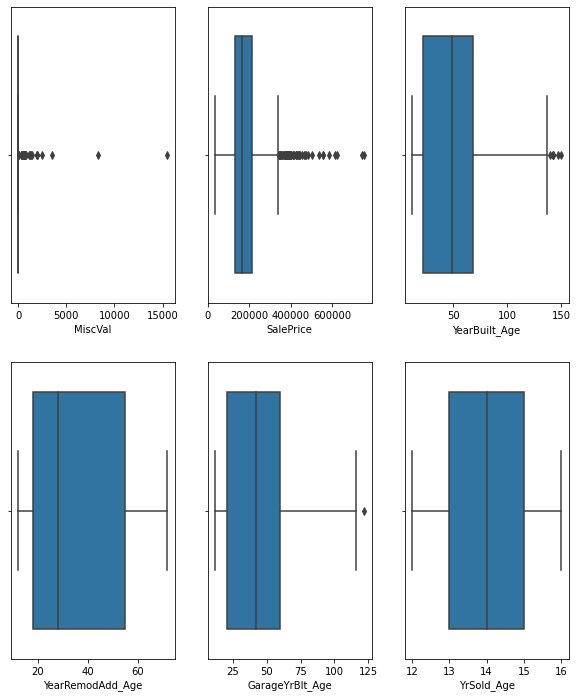

In [340]:
#Rest of the data
fig, axes = plt.subplots(2, 3,figsize=(10, 12))
sns.boxplot(x = 'MiscVal',  data = df1,ax=axes[0,0])
sns.boxplot(x = 'SalePrice',  data = df1,ax=axes[0,1])
sns.boxplot(x = 'YearBuilt_Age',  data = df1,ax=axes[0,2])
sns.boxplot(x = 'YearRemodAdd_Age',  data = df1,ax=axes[1,0])
sns.boxplot(x = 'GarageYrBlt_Age',  data = df1,ax=axes[1,1])
sns.boxplot(x = 'YrSold_Age',  data = df1,ax=axes[1,2])
plt.show()

In [341]:
#Checking the Dependant variable
df1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

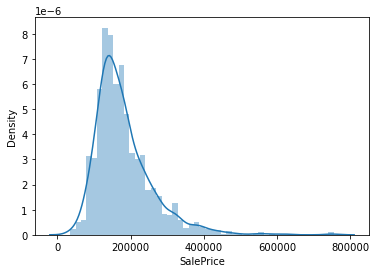

In [342]:
sns.distplot(df1['SalePrice'])

In [343]:

#There is a slight skew in data, so changing to logscale
df1['SalePrice']=np.log(df1.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

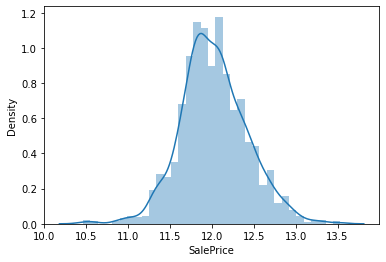

In [344]:
sns.distplot(df1['SalePrice'])

In [345]:
#The data looks less skewed  now

In [346]:
df1.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,WD,Normal,12.247694,19,19,14,19.0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Lvl,FR2,Veenker,1Fam,1Story,...,0,0,0,WD,Normal,12.109011,46,46,15,46.0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,WD,Normal,12.317167,21,20,14,21.0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,1Fam,2Story,...,0,0,0,WD,Abnorml,11.849398,107,52,16,24.0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,1Fam,2Story,...,0,0,0,WD,Normal,12.429216,22,22,14,22.0
5,1-1/2 STORY FINISHED ALL AGES,RL,85.0,14115,IR1,Lvl,Inside,Mitchel,1Fam,1.5Fin,...,0,0,700,WD,Normal,11.870600,29,27,13,29.0
6,1-STORY 1946 & NEWER ALL STYLES,RL,75.0,10084,Reg,Lvl,Inside,Somerst,1Fam,1Story,...,0,0,0,WD,Normal,12.634603,18,17,15,18.0
7,2-STORY 1946 & NEWER,RL,69.0,10382,IR1,Lvl,Corner,NWAmes,1Fam,2Story,...,0,0,350,WD,Normal,12.206073,49,49,13,49.0
8,1-1/2 STORY FINISHED ALL AGES,RM,51.0,6120,Reg,Lvl,Inside,OldTown,1Fam,1.5Fin,...,0,0,0,WD,Abnorml,11.774520,91,72,14,91.0
9,2 FAMILY CONVERSION - ALL STYLES AND AGES,RL,50.0,7420,Reg,Lvl,Corner,BrkSide,2fmCon,1.5Unf,...,0,0,0,WD,Normal,11.678440,83,72,14,83.0


Text(0.5, 1.0, 'Heatmap showing corelations between variables')

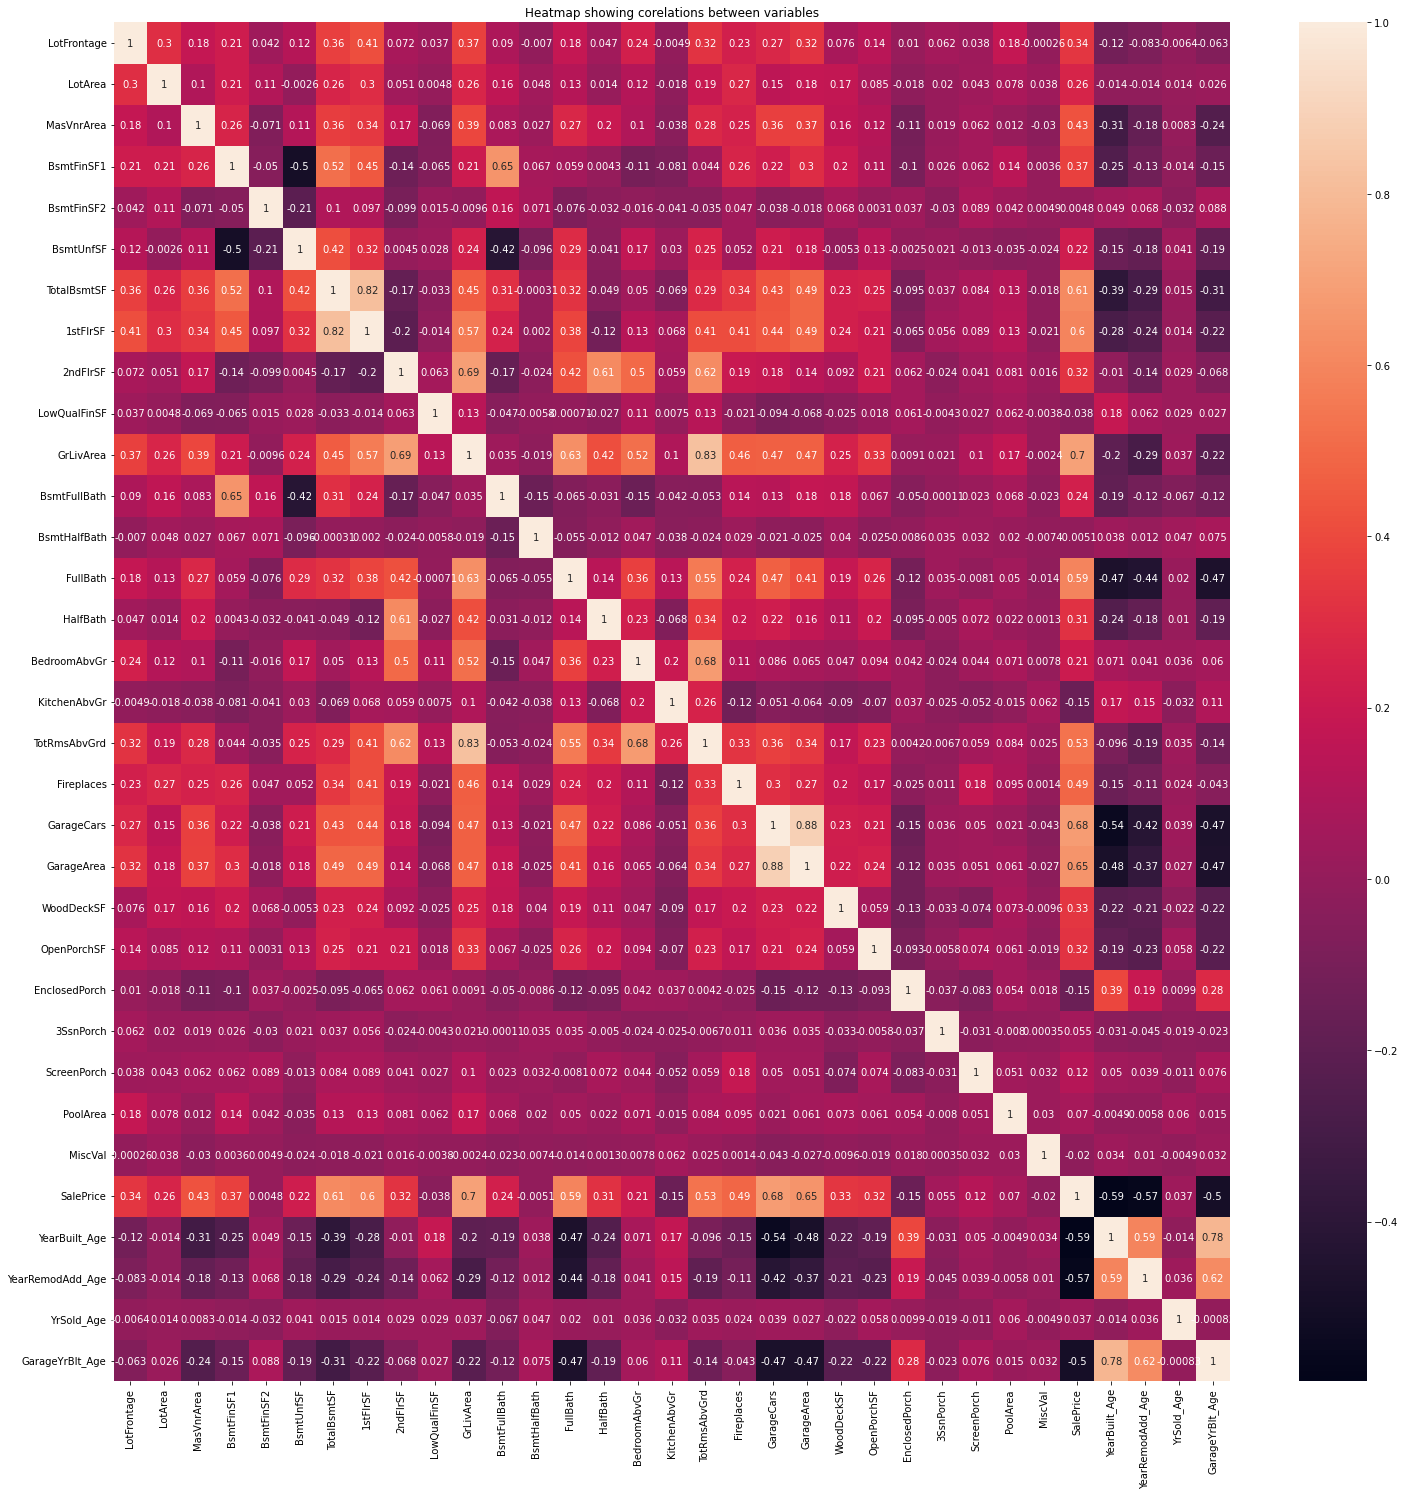

In [347]:
plt.figure(figsize=[25,25])
cor1=df1.corr(method='pearson')
sns.heatmap(cor1,annot=True,)
plt.title('Heatmap showing corelations between variables')

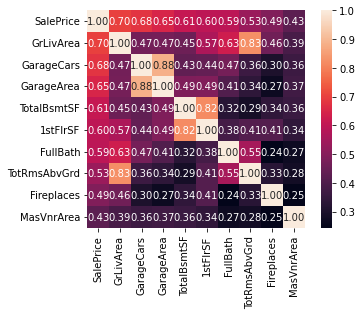

In [348]:
#The above heatmap has too many variables and is confusing, so lets make a heat map with only top 10 corr with salesprice
#saleprice correlation matrix
corrmat = df1.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df1[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [349]:
corr_matrix = df1.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [350]:
#Lets drop those three columns
df1.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'],axis=1,inplace=True)


In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LandContour       1460 non-null   object 
 6   LotConfig         1460 non-null   object 
 7   Neighborhood      1460 non-null   object 
 8   BldgType          1460 non-null   object 
 9   HouseStyle        1460 non-null   object 
 10  OverallQual       1460 non-null   object 
 11  OverallCond       1460 non-null   object 
 12  RoofStyle         1460 non-null   object 
 13  Exterior1st       1460 non-null   object 
 14  Exterior2nd       1460 non-null   object 
 15  MasVnrType        1460 non-null   object 
 16  MasVnrArea        1460 non-null   float64


In [352]:
# Model Building

In [353]:
# Getting Dummy for Categorical Values
CategoryVar = df1.select_dtypes(include=['object']) 
CategoryVar1 = pd.get_dummies(CategoryVar,drop_first=True) 
print(CategoryVar1.shape)

(1460, 180)


In [354]:
#Getting Numerical Values
NumVar = df1.select_dtypes(include=['int64','float64']) 
NumVar.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age'],
      dtype='object')

In [355]:
NumVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotFrontage       1460 non-null   float64
 1   LotArea           1460 non-null   int64  
 2   MasVnrArea        1460 non-null   float64
 3   BsmtFinSF1        1460 non-null   int64  
 4   BsmtFinSF2        1460 non-null   int64  
 5   BsmtUnfSF         1460 non-null   int64  
 6   TotalBsmtSF       1460 non-null   int64  
 7   2ndFlrSF          1460 non-null   int64  
 8   LowQualFinSF      1460 non-null   int64  
 9   GrLivArea         1460 non-null   int64  
 10  BsmtFullBath      1460 non-null   int64  
 11  BsmtHalfBath      1460 non-null   int64  
 12  FullBath          1460 non-null   int64  
 13  HalfBath          1460 non-null   int64  
 14  BedroomAbvGr      1460 non-null   int64  
 15  KitchenAbvGr      1460 non-null   int64  
 16  Fireplaces        1460 non-null   int64  


In [356]:
CategoryVar1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [357]:
df1 = pd.concat([df1, CategoryVar1], axis=1) 

In [358]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Lvl,FR2,Veenker,1Fam,1Story,...,0,0,0,0,1,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,1Fam,2Story,...,0,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,1,0,0,0,1,0


In [359]:
# Removing values where the data has been replaced with dummy values
df1.drop(CategoryVar,axis=1,inplace=True) 

In [360]:
df1.shape

(1460, 210)

In [361]:
df1.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 210 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(26), uint8(180)
memory usage: 599.0 KB


In [363]:
X = df1.drop(['SalePrice'], axis=1)

y = df1['SalePrice']

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 209)
X_test Shape: (438, 209)
y_train Shape: (1021,)
y_test Shape: (438,)


In [365]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age']])


In [366]:
#Transforming X test without fitting
X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age']] = scaler.transform(X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'YrSold_Age',
       'GarageYrBlt_Age']])

In [367]:
#Ridge 

In [368]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()
#Cross Validation
folds = 5
model_cv_Ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_Ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [369]:
cv_results = pd.DataFrame(model_cv_Ridge.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.071783,-0.102533
1,{'alpha': 0.001},-0.071785,-0.102491
2,{'alpha': 0.01},-0.071801,-0.102238
3,{'alpha': 0.05},-0.071852,-0.101487
4,{'alpha': 0.1},-0.071911,-0.100868
5,{'alpha': 0.2},-0.072061,-0.099983
6,{'alpha': 0.3},-0.072208,-0.099326
7,{'alpha': 0.4},-0.072337,-0.098809
8,{'alpha': 0.5},-0.072461,-0.098404
9,{'alpha': 0.6},-0.072575,-0.098057


In [370]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

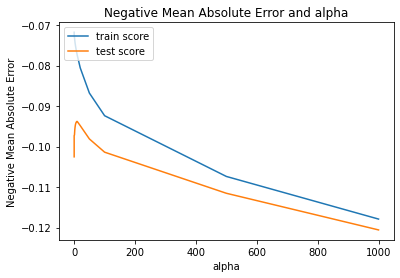

In [371]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [372]:
model_cv_Ridge.best_params_


{'alpha': 10.0}

In [373]:
alpha = 10
ridge=Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-8.15356229e-03  1.60429035e-02  1.36651951e-03  2.53331996e-03
  2.68438635e-03  1.15163949e-02  1.48179468e-02  2.69787264e-02
 -4.17094970e-03  1.01763379e-01  2.68701713e-02  4.10893076e-03
  2.98501649e-02  1.81021414e-02  1.20163936e-02 -2.32171118e-02
  2.43362364e-02  4.53446573e-02  1.36014468e-02 -2.64458966e-03
  8.59181660e-03  6.29595349e-03  1.16218543e-02 -1.50124610e-02
 -8.81424733e-04 -4.53006082e-02 -3.06549859e-02  8.50640794e-03
  5.24875944e-03  1.06281253e-02 -6.40916892e-02  3.97936049e-02
  3.16880498e-03 -2.07393623e-03 -5.02306315e-03  3.87451949e-02
  4.71146030e-02 -3.01391831e-02 -6.50473883e-02  1.92625914e-02
 -2.75433497e-02  2.09170174e-02  7.14029892e-03  6.65486218e-02
  5.24516561e-02  6.61510227e-02  1.76233308e-02  2.20051167e-02
 -4.51382869e-02  7.93657779e-03  3.17985782e-02  3.85387389e-02
  3.95307812e-02  3.61877905e-02 -3.20962791e-02 -1.22729986e-02
 -3.87844530e-03 -3.65399878e-03 -9.69009441e-03  2.65856325e-02
  4.23861877e-02 -7.08810

In [374]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

r2_train_ridge=r2_score(y_train,y_pred_train_ridge)
print('R2 on Train: ')
print(r2_train_ridge)

r2_test_ridge=r2_score(y_test,y_pred_test_ridge)
print('R2 on Test: ')
print(r2_test_ridge)

rss1_ridge=np.sum(np.square(y_train-y_pred_train_ridge))
print('RSS on Train: ')
print(rss1_ridge)

rss2_ridge=np.sum(np.square(y_test-y_pred_test_ridge))
print('RSS on Test: ')
print(rss2_ridge)

mse_train_ridge=mean_squared_error(y_train, y_pred_train_ridge)
print('MSE on Train: ')
print(mse_train_ridge)

mse_test_ridge=mean_squared_error(y_test, y_pred_test_ridge)
print('MSE on Test: ')
print(mse_test_ridge)



R2 on Train: 
0.9145929830069777
R2 on Test: 
0.8733694452137277
RSS on Train: 
13.70716366531259
RSS on Test: 
9.126083133356438
MSE on Train: 
0.01342523375642761
MSE on Test: 
0.020835806240539812


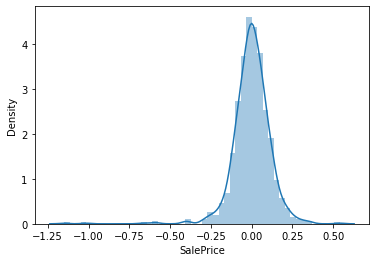

In [375]:
#error Distrubution _ Train -Ridge
sns.distplot((y_train-y_pred_train_ridge))
plt.show()

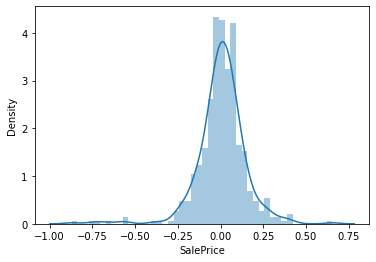

In [376]:
#error Distrubution _ Test -Ridge
sns.distplot((y_test-y_pred_test_ridge))
plt.show()

In [377]:
#Lasso

In [378]:
lasso = Lasso()

# cross validation
model_cv_Lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_Lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [379]:
cv_results = pd.DataFrame(model_cv_Lasso.cv_results_)
cv_results[['params', 'mean_train_score', 'mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'alpha': 0.0001},-0.072551,-0.095755
1,{'alpha': 0.001},-0.080732,-0.093595
2,{'alpha': 0.01},-0.111409,-0.114949
3,{'alpha': 0.05},-0.134543,-0.135751
4,{'alpha': 0.1},-0.167104,-0.167817
5,{'alpha': 0.2},-0.257391,-0.258239
6,{'alpha': 0.3},-0.310053,-0.310647
7,{'alpha': 0.4},-0.310053,-0.310647
8,{'alpha': 0.5},-0.310053,-0.310647
9,{'alpha': 0.6},-0.310053,-0.310647


In [380]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

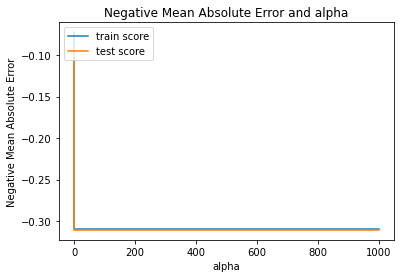

In [381]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [382]:
model_cv_Lasso.best_params_

{'alpha': 0.001}

In [383]:
alpha = 0.001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.0067289   0.01420467  0.00223673  0.         -0.          0.00652895
  0.02448165  0.0104263  -0.0051533   0.11853704  0.02798053  0.00447964
  0.02729493  0.01599972  0.008292   -0.02433526  0.02499464  0.0470261
  0.01326046 -0.0006757   0.00825983  0.00530604  0.01158367 -0.01703346
 -0.         -0.04877152 -0.03555249  0.00740723  0.          0.
 -0.07705663  0.03249508 -0.          0.         -0.          0.
  0.00736036 -0.02128257 -0.06953589  0.         -0.          0.
  0.          0.02518773  0.          0.04460838 -0.          0.
 -0.          0.0005057   0.          0.          0.01419733  0.03207389
 -0.         -0.         -0.         -0.         -0.          0.01525343
  0.03032443  0.          0.11771544 -0.0717628  -0.         -0.05662315
 -0.04506077 -0.         -0.         -0.         -0.          0.04845993
  0.09407512 -0.01998729  0.         -0.02541821  0.          0.08407759
  0.01824444  0.          0.         -0.          0.         -0.05050107
 -0.0029781

In [384]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

r2_train_lasso=r2_score(y_train,y_pred_train_lasso)
print('R2 on Train: ')
print(r2_train_lasso)

r2_test_lasso=r2_score(y_test,y_pred_test_lasso)
print('R2 on Test: ')
print(r2_test_lasso)

rss1_lasso=np.sum(np.square(y_train-y_pred_train_lasso))
print('RSS on Train: ')
print(rss1_lasso)

rss2_lasso=np.sum(np.square(y_test-y_pred_test_lasso))
print('RSS on Test: ')
print(rss2_lasso)

mse_train_lasso=mean_squared_error(y_train, y_pred_train_lasso)
print('MSE on Train: ')
print(mse_train_lasso)

mse_test_lasso=mean_squared_error(y_test, y_pred_test_lasso)
print('MSE on Test: ')
print(mse_test_lasso)


R2 on Train: 
0.9015761358468567
R2 on Test: 
0.8674629689156327
RSS on Train: 
15.796266653708901
RSS on Test: 
9.551754440037453
MSE on Train: 
0.015471367927236926
MSE on Test: 
0.021807658538898295


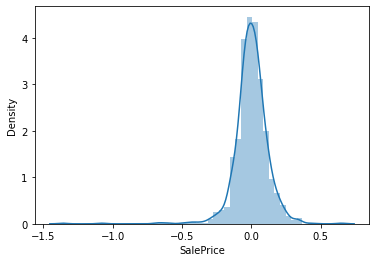

In [385]:
#error Distrubution - Train _ Lasso
sns.distplot((y_train-y_pred_train_lasso))
plt.show()

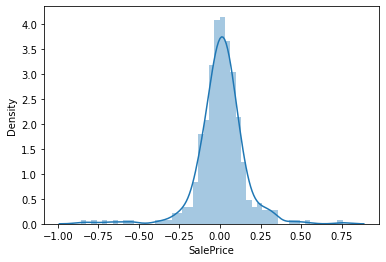

In [386]:
#error Distrubution - Test _ Lasso
sns.distplot((y_test-y_pred_test_lasso))
plt.show()

In [387]:
betas= pd.DataFrame(index=X.columns)
betas.row=X.columns
betas['Ridge']=ridge.coef_
betas['lasso']=lasso.coef_
pd.set_option('display.max_rows',None)
betas.sort_values(by=['Ridge'])

,Ridge,lasso
OverallCond_Fair,-0.138868,-0.215627
Neighborhood_Edwards,-0.085178,-0.071763
OverallQual_Poor,-0.081390,-0.000000
Neighborhood_IDOTRR,-0.066712,-0.056623
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.065047,-0.069536
MSSubClass_1-STORY 1945 & OLDER,-0.064092,-0.077057
KitchenQual_Fa,-0.062365,-0.017467
OverallCond_Below Average,-0.061265,-0.067560
BldgType_Twnhs,-0.060815,-0.050501
ExterQual_Fa,-0.060460,-0.031710


In [388]:
betas.sort_values(by=['lasso'])

,Ridge,lasso
OverallCond_Fair,-0.138868,-0.215627
MSSubClass_1-STORY 1945 & OLDER,-0.064092,-0.077057
Neighborhood_Edwards,-0.085178,-0.071763
MSSubClass_2-STORY PUD - 1946 & NEWER,-0.065047,-0.069536
OverallCond_Below Average,-0.061265,-0.067560
Neighborhood_IDOTRR,-0.066712,-0.056623
BldgType_Twnhs,-0.060815,-0.050501
OverallCond_Average,-0.043799,-0.049719
YearBuilt_Age,-0.045301,-0.048772
Neighborhood_MeadowV,-0.059348,-0.045061
